# Supplementary Figure 1
A. Purification of recombinant Microprocessor  
B. Design of the minimal human pri-miRNAs  
C. Correlation between replicates

In [1]:
import time
today = time.strftime('%Y-%m-%d')
name = 'Seungchan Baek'
print 'Last revised by %s at %s.' % (name, today)

Last revised by Seungchan Baek at 2020-10-13.


In [2]:
home = '/casa/bsc/projects/1_DCS/2004_paper_prep/'
utilpath = '/casa/bsc/notebooks/'
%cd $home

/casa/bsc/projects/1_DCS/2004_paper_prep


In [3]:
from __future__ import division
import sys; sys.path.append(utilpath)
from basic import gen_result_dir
from util import *
resultpath = gen_result_dir('results/')
print 'resultpath:', resultpath

resultpath: results/201013/


In [4]:
from scipy.stats import pearsonr, spearmanr
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### Import supplementary tables

In [5]:
s1 = pd.read_csv('supplementary/201012_s1_pri-info.csv', header=1, index_col=0)
s2 = pd.read_csv('supplementary/201012_s2_pri-construct.csv', header=1, index_col=0)
s3 = pd.read_csv('supplementary/201012_s3_input.csv', header=1, index_col=0)
s4 = pd.read_csv('supplementary/201012_s4_cleavage-product.csv', header=1)
print 's1:\t%s'%', '.join(list(s1.columns))
print 's2:\t%s'%', '.join(list(s2.columns)[:6])
print 's3:\t%s'%', '.join(list(s3.columns))
print 's4:\t%s'%', '.join(list(s4.columns)[:9])

s1:	5p mature, 5p sequence, 3p mature, 3p sequence, Note
s2:	Chr, Start, End, Strand, Construct sequence, 100way phyloP scores (pre-miRNA -/+ 100nt)
s3:	set1-1, set1-2, set2, set3-1, set3-2, set4, set5-1, set5-2
s4:	Pri-miRNA, rstart, rend, pilot-1, pilot-2, set1-1, set1-2, set2-1, set2-2


In [7]:
allpris = s1.index
mirtrons = [ pri for pri in allpris if s1.loc[pri,'Note'].find('Mirtron')>=0 ]
capped = [ pri for pri in allpris if s1.loc[pri,'Note'].find('Capped miRNA')>=0 ]
drosensitive = [ pri for pri in allpris if s1.loc[pri,'Note'].find('DROSHA KO-sensitive')>=0 ]
fclipdetected = [ pri for pri in allpris if s1.loc[pri,'Note'].find('fCLIP site-determined')>=0 ]
dbmirs = [ pri for pri in allpris if s1.loc[pri,'Note'].find('MirGeneDB')>=0 ]
print len(mirtrons), len(capped), len(drosensitive), len(fclipdetected), len(dbmirs)

239 11 157 281 519


In [8]:
LIBRARIES = [ 'set1', 'set2', 'set3', 'set4', 'set5' ]

# A. Purification of recombinant Microprocessor

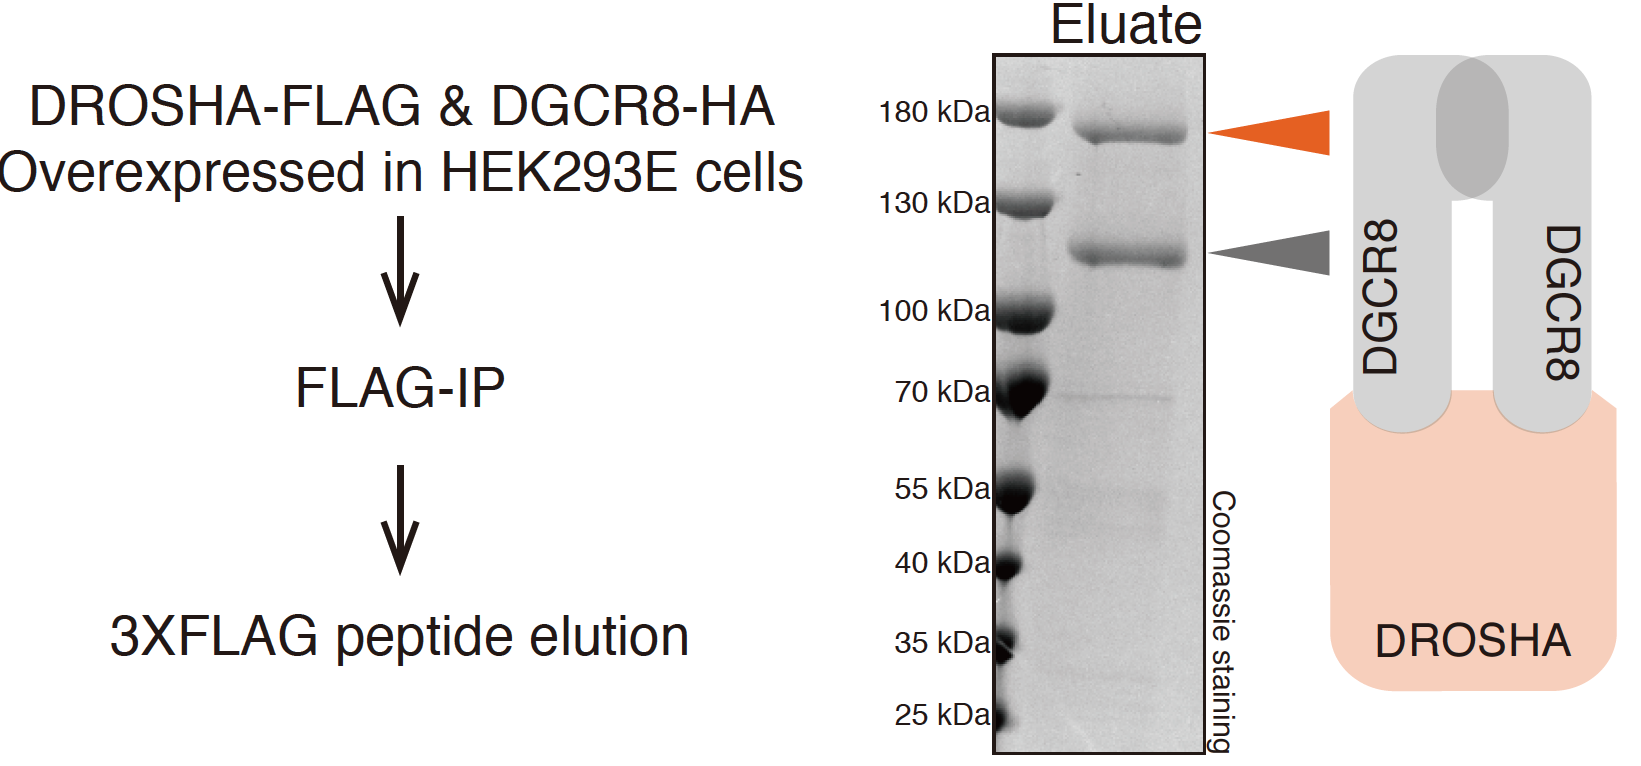

In [9]:
from IPython.display import Image
Image(filename='supplementary/figures/sup1A.png', width=400)

# B. Design of the minimal human pri-miRNAs
- minimal 5' flanking segment = 20
- minimal 3' flanking segment = 25

In [10]:
min5f = 20
min3f = 25

In [11]:
phypris = {}
for pri in drosensitive:
    phypri = s2.loc[pri, '100way phyloP scores (pre-miRNA -/+ 100nt)'][1:-1]
    phypri = map(float, phypri.split(', '))
    phypris[pri] = phypri

In [12]:
phy5fs = zip(*[ phypris[pri][50:100] for pri in phypris ])
phy5fs = [ [ p for p in ps if p!='-' ] for ps in phy5fs ]
phy5avs = map(np.average, phy5fs)[::-1]

phy3fs = zip(*[ phypris[pri][-100:-50] for pri in phypris ])
phy3fs = [ [ p for p in ps if p!='-' ] for ps in phy3fs ]
phy3avs = map(np.average, phy3fs)

In [13]:
x = range(50)
c5, c3, shade = '#d95f02', '#1b9e77', '#dddddd'
lw = 2

Text(0.5,-0.23,u'5$^\\prime$ or 3$^\\prime$ flanking region')

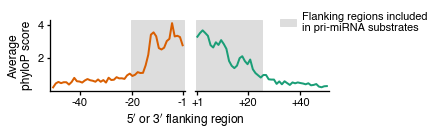

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,1.3), sharey=True)
fig.subplots_adjust(wspace=.07)

ax1.plot(x, phy5avs, color=c5, lw=lw, zorder=2)
ax2.plot(x, phy3avs, color=c3, lw=lw, zorder=2)

for ax, minf in zip([ax1,ax2],[min5f,min3f]):
    ax.set_xlim(-1, 50)
    ax.set_xticks([0, 19, 39])
    ax.axvspan(-.5, -.5+minf, color='#dddddd', label='Flanking regions included\n\
in pri-miRNA substrates')

ax1.set_xticklabels(['-1', '-20', '-40'])
ax2.set_xticklabels(['+1', '+20', '+40'])    
ax1.set_ylabel('Average\nphyloP score', fontsize=12)
ax1.invert_xaxis()
ax2.spines['left'].set_visible(False)
ax2.tick_params(left='off')
ax2.legend(loc=(.6,.75), prop={'size':11}, handletextpad=.5, handlelength=1.5,frameon=False)
fig.text(0.5, -.23, r"5$^\prime$ or 3$^\prime$ flanking region", ha='center', fontsize=12)
#fig.savefig(resultpath + '200612_s1b_minimal_pri.pdf')

# C. Correlation between replicates

In [18]:
set1pris = [ pri for pri in allpris if s2.loc[pri,'Library included'].find('1')>=0 ]
print len(set1pris)

1645


In [19]:
color, ecolor = '#969696', '#545454'
lw = .7
alpha = .6
s = 5
rep1, rep2 = 'set1-1', 'set1-2'
inp1 = np.log2(s3.loc[set1pris,rep1].astype(int)+1)
inp2 = np.log2(s3.loc[set1pris,rep2].astype(int)+1)
xmin, xmax = 0, 12.5
ymin, ymax = 0, 12.5

Text(0.5,1,u'Log2 (input + 1)')

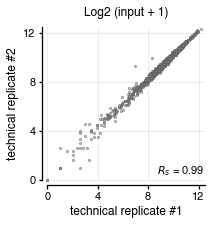

In [20]:
## reproducibility between technical replicates
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.scatter(inp1, inp2, s=s, color=color, lw=lw, edgecolor=ecolor, alpha=alpha, zorder=2)

ax.set_xlim(xmin-.4, xmax+.4)
ax.set_ylim(ymin-.4, ymax+.4)
ax.set_xticks(range(xmin, int(xmax)+1, 4))
ax.set_yticks(range(ymin, int(ymax)+1, 4))
ax.set_xlabel('technical replicate #1', fontsize=12)
ax.set_ylabel('technical replicate #2', fontsize=12)

ax.spines['bottom'].set_bounds(0, xmax)
ax.spines['left'].set_bounds(0, ymax)
r = spearmanr(inp1.tolist(), inp2.tolist())[0]
ax.text(xmax, ymin+.5, '$R_s$ = %.2f'%r, fontsize=11, ha='right')

squ = plt.Rectangle((-.1,-.1), xmax+.1, ymax+.1, fc='w'); ax.add_patch(squ) 
ax.grid(clip_path=squ, ls='-', lw=.5)
ax.set_title('Log2 (input + 1)', fontsize=12)
#fig.savefig(resultpath + '200612_s1c_reproducibility_input_tech.pdf')

In [21]:
inpsum = pd.DataFrame()
for inp in ['set1', 'set3', 'set5']:
    rep1 = '%s-1'%inp
    rep2 = '%s-2'%inp
    inpsum[inp] = s3[[rep1,rep2]].sum(axis=1)
inpsum['set2'] = s3['set2']
inpsum['set4'] = s3['set4'] 
inpsum = inpsum[LIBRARIES].astype(int)
inpsum.head(1)

,set1,set2,set3,set4,set5
Pri-miRNA,,,,,
hsa-let-7a-1,1373,474,0,2,0


In [22]:
color, ecolor = '#969696', '#545454'
lw = .7
alpha = .6
s = 5
rep1, rep2 = 'set1', 'set2'
inp1 = np.log2(inpsum.loc[set1pris, rep1]+1)
inp2 = np.log2(inpsum.loc[set1pris, rep2]+1)
xmin, xmax = 0, 13
ymin, ymax = 0, 13

Text(0.5,1,u'Log2 (input + 1)')

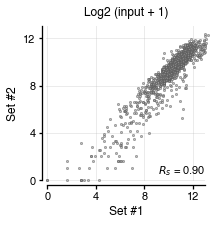

In [23]:
## reproducibility between replicates
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.scatter(inp1, inp2, s=s, color=color, lw=lw, edgecolor=ecolor, alpha=alpha, zorder=2)

ax.set_xticks(range(xmin, xmax, 4))
ax.set_yticks(range(ymin, ymax, 4))
ax.set_xlim(xmin-.4, xmax+.4)
ax.set_ylim(ymin-.4, ymax+.4)
ax.set_xlabel('Set #1', fontsize=12)
ax.set_ylabel('Set #2', fontsize=12)

ax.spines['bottom'].set_bounds(0, xmax)
ax.spines['left'].set_bounds(0, ymax)
r = spearmanr(inp1, inp2)[0]
ax.text(xmax, ymin+.5, '$R_s$ = %.2f'%r, fontsize=11, ha='right')

squ = plt.Rectangle((-.1,-.1), xmax+.1, ymax+.1, fc='w'); ax.add_patch(squ)
ax.grid(clip_path=squ, ls='-', lw='.5')
ax.set_title('Log2 (input + 1)', fontsize=12)
#fig.savefig(resultpath + '200612_s1c_reproducibility_input.pdf')

In [24]:
## cleaved
start, mid, end = 1, 63, 125
clv5f = s4[(s4['rstart']==start)&(s4['rend']<mid)].set_index('Pri-miRNA')
clv3f = s4[(s4['rstart']>mid)&(s4['rend']==end)].set_index('Pri-miRNA')
clvhn = s4[(s4['rstart']<mid)&(s4['rend']>mid)]
clvn5 = clvhn[clvhn['rstart']==start]
clvn3 = clvhn[clvhn['rend']==end]
clvh = clvhn.drop(clvn5.index).drop(clvn3.index).set_index('Pri-miRNA')
clvn5 = clvn5.set_index('Pri-miRNA'); clvn3 = clvn3.set_index('Pri-miRNA')

In [25]:
## reproducibility between technical replicates
rep1, rep2 = 'set1-1', 'set1-2'
syn1clv = [ mir for mir in set1pris if all([mir in l.index for l in [clv5f,clv3f,clvh]]) ]
f51 = [ np.log2(clv5f.loc[mir,rep1].sum()+1) for mir in syn1clv ]
f52 = [ np.log2(clv5f.loc[mir,rep2].sum()+1) for mir in syn1clv ]
f31 = [ np.log2(clv3f.loc[mir,rep1].sum()+1) for mir in syn1clv ]
f32 = [ np.log2(clv3f.loc[mir,rep2].sum()+1) for mir in syn1clv ]
fh1 = [ np.log2(clvh.loc[mir,rep1].sum()+1) for mir in syn1clv ]
fh2 = [ np.log2(clvh.loc[mir,rep2].sum()+1) for mir in syn1clv ]
r5 = spearmanr(f51, f52)[0]
r3 = spearmanr(f31, f32)[0]
rh = spearmanr(fh1, fh2)[0]
xmin, xmax = 0, 16.5
ymin, ymax = 0, 16
lw = .7
a = .2
s = 5

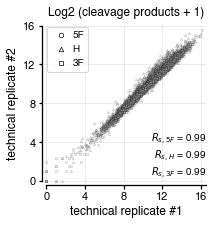

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.scatter(f51, f52, s=s, c='w', edgecolor='k', marker='o', lw=lw, alpha=a, label='5F', zorder=2)
ax.scatter(fh1, fh2, s=s, c='w', edgecolor='k', marker='^', lw=lw, alpha=a, label='H', zorder=2)
ax.scatter(f31, f32, s=s, c='w', edgecolor='k', marker='s', lw=lw, alpha=a, label='3F', zorder=2)

ax.set_xticks(range(xmin, int(xmax)+1, 4))
ax.set_yticks(range(ymin, int(ymax)+1, 4))
ax.set_xlim(xmin-.4, xmax+.4)
ax.set_ylim(ymin-.4, ymax+.4)
ax.set_xlabel('technical replicate #1', fontsize=12)
ax.set_ylabel('technical replicate #2', fontsize=12)

ax.spines['bottom'].set_bounds(0, xmax)
ax.spines['left'].set_bounds(0, ymax)
ax.set_title('Log2 (cleavage products + 1)', fontsize=12)
ax.text(16.5,.5,'$R_{s,5F}$ = %.2f\n$R_{s,H}$ = %.2f\n$R_{s,3F}$ = %.2f'%(r5,rh,r3),ha='right')

leg = ax.legend(loc='upper left', handletextpad=.1, markerscale=2)
for lh in leg.legendHandles:
    lh.set_alpha(1)
squ = plt.Rectangle((-.1,-.1), xmax+.1, ymax+.1, fc='w'); ax.add_patch(squ)
ax.grid(clip_path=squ, ls='-', lw=.5)
#fig.savefig(resultpath + '200612_s1c_reproducibility_clv_tech.pdf')

In [27]:
clvsum = pd.DataFrame()
for lib in LIBRARIES:
    rep1 = '%s-1'%lib
    rep2 = '%s-2'%lib
    clvsum[lib] = s4.set_index(['Pri-miRNA','rstart','rend'])[[rep1,rep2]].sum(axis=1)
clvsum = clvsum.reset_index()
clvsum.head(1)

,Pri-miRNA,rstart,rend,set1,set2,set3,set4,set5
0,hsa-let-7a-1,1,8,4,4,0,0,0


In [28]:
start, mid, end = 1, 63, 125
clv5f = clvsum[(clvsum['rstart']==start)&(clvsum['rend']<mid)].set_index('Pri-miRNA')
clv3f = clvsum[(clvsum['rstart']>mid)&(clvsum['rend']==end)].set_index('Pri-miRNA')
clvhn = clvsum[(clvsum['rstart']<mid)&(clvsum['rend']>mid)]
clvn5 = clvhn[clvhn['rstart']==start]
clvn3 = clvhn[clvhn['rend']==end]
clvh = clvhn.drop(clvn5.index).drop(clvn3.index).set_index('Pri-miRNA')
clvn5 = clvn5.set_index('Pri-miRNA'); clvn3 = clvn3.set_index('Pri-miRNA')

In [29]:
## reproducibility between replicates
rep1, rep2 = 'set1', 'set2'
syn1clv = [ mir for mir in set1pris if all([mir in l.index for l in [clv5f,clv3f,clvh]]) ]
f51 = [ np.log2(clv5f.loc[mir,rep1].sum()+1) for mir in syn1clv ]
f52 = [ np.log2(clv5f.loc[mir,rep2].sum()+1) for mir in syn1clv ]
f31 = [ np.log2(clv3f.loc[mir,rep1].sum()+1) for mir in syn1clv ]
f32 = [ np.log2(clv3f.loc[mir,rep2].sum()+1) for mir in syn1clv ]
fh1 = [ np.log2(clvh.loc[mir,rep1].sum()+1) for mir in syn1clv ]
fh2 = [ np.log2(clvh.loc[mir,rep2].sum()+1) for mir in syn1clv ]
r5 = spearmanr(f51, f52)[0]
r3 = spearmanr(f31, f32)[0]
rh = spearmanr(fh1, fh2)[0]
xmin, xmax = 2, 17
ymin, ymax = 0, 14
lw = .7
a = .2
s = 5

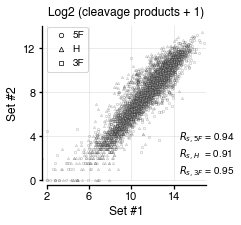

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.scatter(f51, f52, s=s, c='w', edgecolor='k', marker='o', lw=lw, alpha=a, label='5F', zorder=2)
ax.scatter(fh1, fh2, s=s, c='w', edgecolor='k', marker='^', lw=lw, alpha=a, label='H', zorder=2)
ax.scatter(f31, f32, s=s, c='w', edgecolor='k', marker='s', lw=lw, alpha=a, label='3F', zorder=2)

ax.set_xticks(range(xmin, xmax, 4))
ax.set_yticks(range(ymin, ymax, 4))
ax.set_xlim(xmin-.4, xmax+.4)
ax.set_ylim(ymin-.4, ymax+.4)
ax.set_xlabel('Set #1', fontsize=12)
ax.set_ylabel('Set #2', fontsize=12)

ax.spines['bottom'].set_bounds(xmin, xmax)
ax.spines['left'].set_bounds(ymin, ymax)
ax.set_title('Log2 (cleavage products + 1)', fontsize=12)
ax.text(14.5,.5,'$R_{s,5F}$ = %.2f\n$R_{s,H}$  = %.2f\n$R_{s,3F}$ = %.2f'%(r5,rh,r3))
leg = ax.legend(loc='upper left', handletextpad=.1, markerscale=2)
for lh in leg.legendHandles:
    lh.set_alpha(1)
squ = plt.Rectangle((-.1,-.1), xmax+.1, ymax+.1, fc='w'); ax.add_patch(squ)
ax.grid(clip_path=squ, ls='-', lw=.5)
#fig.savefig(resultpath + '200612_s1c_reproducibility_clv.pdf')